## Separating a customer base into different segements

We analyze a wholesale customers dataset with their annual spendings in various product categories. The task is to find the underlying structure in the data to optimize the delivery for the customers.

### Initial data exploration

In [20]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
np.random.seed(42)
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

In [21]:
# We import a dataset with the anual spendings of various customers
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [22]:
# Initial inspection of the data
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [23]:
# We select 3 different samples from the dataset and explore their differences
indices = [2, 12, 72]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,31714,12319,11757,287,3881,2931
2,4420,5139,2661,8872,1321,181


We explore the distributions of the different features and try to find correlations between the features. 

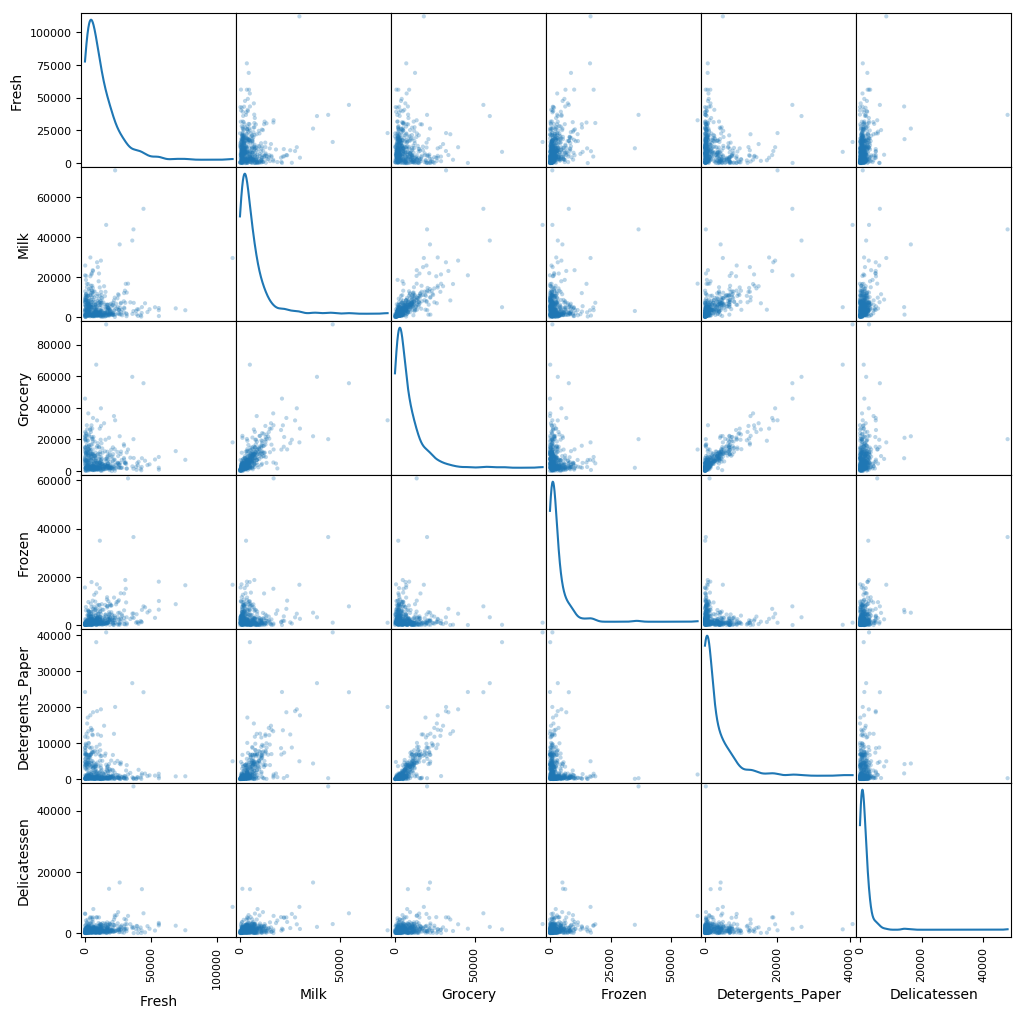

In [35]:
# Plot a scatter matrix for visualizing the correlations between the features
plt.style.use('default')
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (12, 12), diagonal = 'kde')
plt.show()

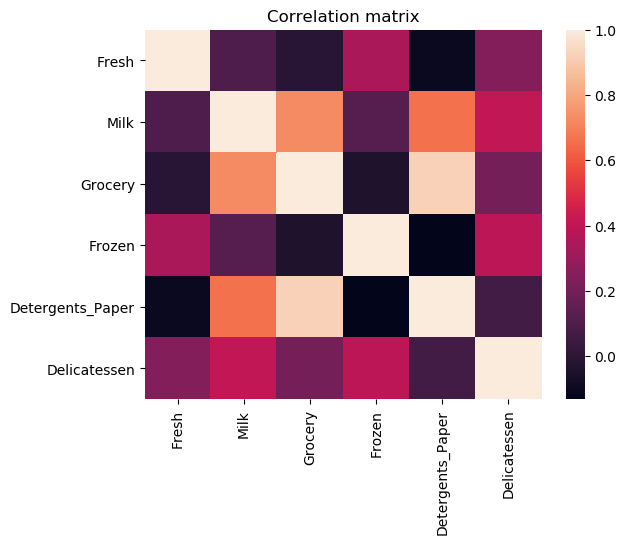

In [33]:
# Plotting the correlations between the features
ax = plt.axes()
sns.heatmap(data.corr(), ax=ax)
ax.set_title('Correlation matrix')
plt.show()

TODO: Did you find any correlations? Can you come up with some customers that would show such a pattern? Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others.

### Explore the main directions of the data (principal component analysis)

Often it is useful to eliminate features that do not add much information to the model and we try to reduce the independent variables. We can do this with principal component analysis. Simplified, principal component analysis is finding the main (principal) directions (components) in the n-dimensional feature vector space. 

#### Begin: PCA Example

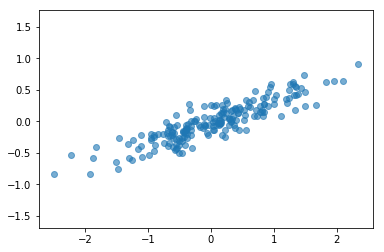

In [53]:
# First we create some random data with a clear direction
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=.6)
plt.axis('equal');

In [54]:
# Then we calculate the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

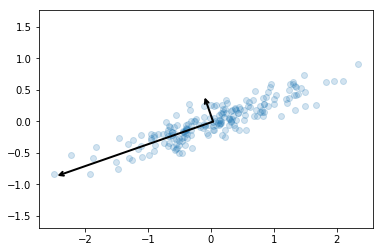

In [56]:
# And display the first two principal components
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

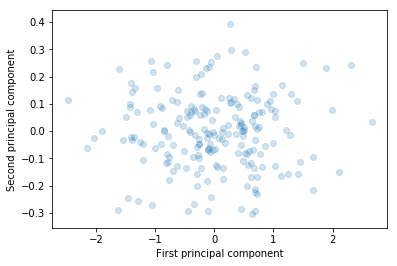

In [60]:
# And now we can transform the data onto these new directions
X_transformed = pca.transform(X)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.2)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

#### End: PCA Example

We explore the first 6 principal components (dimensions) and examine their variance. 

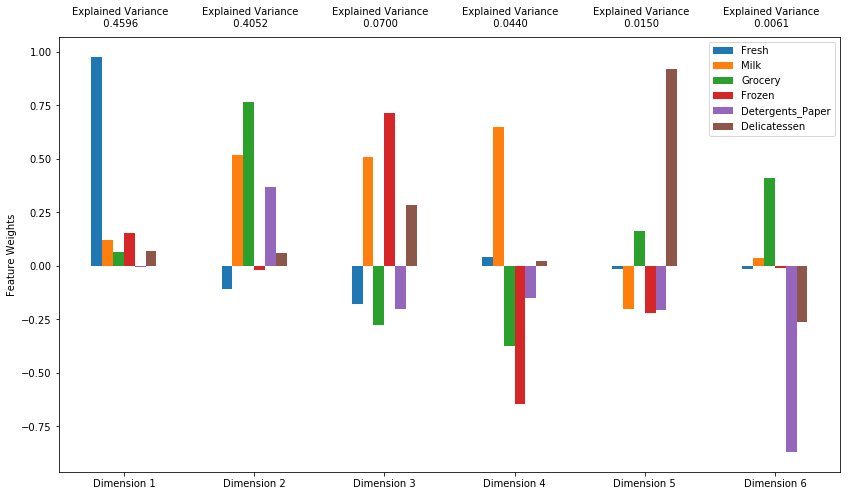

In [63]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=42).fit(data)

# Generate PCA results plot
pca_results = vs.pca_results(data, pca)

TODO: How many dimensions are explaning the most variance in the data?

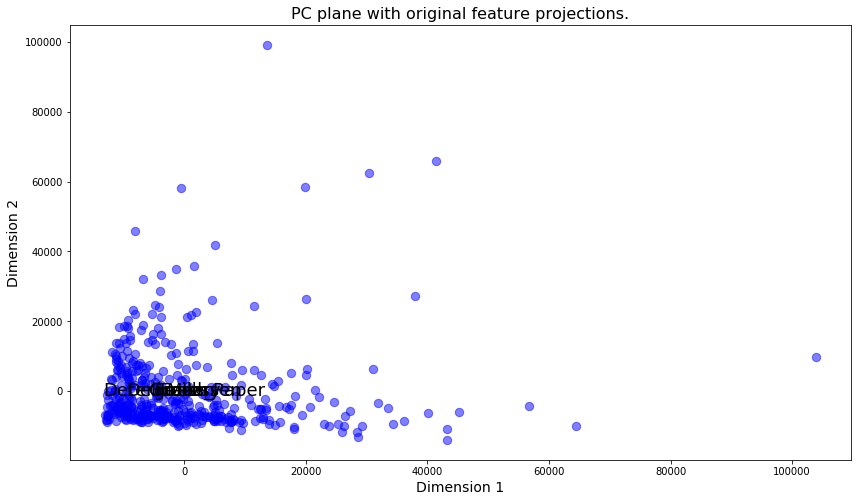

In [65]:

# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=42).fit(data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.biplot(data, reduced_data, pca)